## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [57]:
# Combine the data into a single dataset
# Display the data table for preview
pharma_combine=pd.merge(mouse_metadata,study_results)
pharma_combine

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
mice_count=pharma_combine['Mouse ID'].count()
mice_count

1893

In [4]:
#confirm mice count w/ drop duplicates
mice_id_list=pharma_combine['Mouse ID'].tolist()
print(len(set(mice_id_list)))


249


In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID. 
mice_id=pharma_combine.loc[:,['Mouse ID']]
mice_id

,Mouse ID
0,k403
1,k403
2,k403
3,k403
4,k403
...,...
1888,z969
1889,z969
1890,z969
1891,z969


In [6]:
# Getting the duplicate mice by ID number that shows up for Timepoint. Used the duplicated funcation
mice_time=pharma_combine.loc[:,['Timepoint']]
mice_time

,Timepoint
0,0
1,5
2,10
3,15
4,20
...,...
1888,25
1889,30
1890,35
1891,40


In [7]:
# Optional: Get all the data for the duplicate mouse ID. Used the duplicated funcation
mice_dupe=mice_id[mice_id.duplicated()]
print(mice_id)

     Mouse ID
0        k403
1        k403
2        k403
3        k403
4        k403
...       ...
1888     z969
1889     z969
1890     z969
1891     z969
1892     z969

[1893 rows x 1 columns]


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mice_id=mice_id.drop_duplicates()
mice_id

,Mouse ID
0,k403
10,s185
20,x401
30,m601
40,g791
...,...
1858,z314
1860,z435
1863,z581
1873,z795


In [9]:
# Checking the number of mice in the clean DataFrame.
mice_id_count=mice_id['Mouse ID'].count()
mice_id_count
pd.DataFrame({"Number Of Mice":[mice_id_count]})

,Number Of Mice
0,249


## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function
tumor_mean=pharma_combine.groupby("Drug Regimen")['Tumor Volume (mm3)'].mean()
#print(tumor_mean)
tumor_median=pharma_combine.groupby("Drug Regimen")['Tumor Volume (mm3)'].median()
#print(tumor_median)
tumor_var=pharma_combine.groupby("Drug Regimen")['Tumor Volume (mm3)'].var()
#print(tumor_var)
tumor_std=pharma_combine.groupby("Drug Regimen")['Tumor Volume (mm3)'].std()
#print(tumor_std)
tumor_sem=pharma_combine.groupby("Drug Regimen")['Tumor Volume (mm3)'].sem()
#print(tumor_sem)

sum_stat=pd.DataFrame({"Mean":tumor_mean,"Median":tumor_median,"Variance":tumor_var,"Standard Deviation":tumor_std,"SEM":tumor_sem})
sum_stat

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Mice Count')

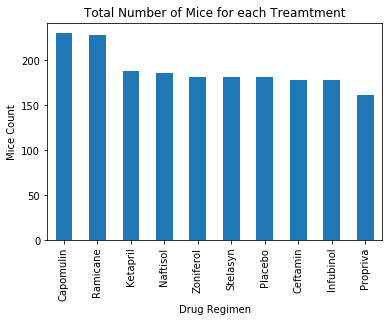

In [35]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

pharma_combine["Drug Regimen"].value_counts().plot.bar()
plt.title("Total Number of Mice for each Treamtment")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice Count")


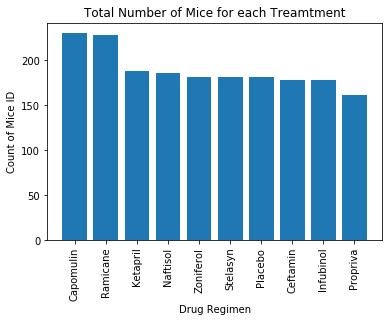

In [37]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mice_data=pharma_combine["Drug Regimen"].value_counts()
plt.bar(mice_data.index, mice_data)
plt.title("Total Number of Mice for each Treamtment")
plt.xlabel("Drug Regimen")
plt.ylabel("Count of Mice ID")
plt.xticks(rotation=90);


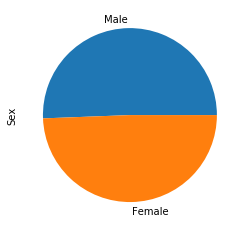

In [39]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pharma_combine["Sex"].value_counts().plot.pie()


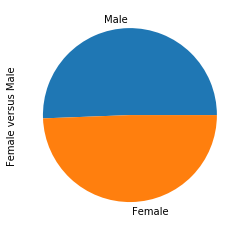

In [42]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

female_male=pharma_combine["Sex"].value_counts()
plt.pie(female_male, labels={"Female", "Male"})
plt.ylabel("Female versus Male");


## Quartiles, Outliers and Boxplots

In [55]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
pharma_combine
# Start by getting the last (greatest) timepoint for each mouse
greatest_tumor=pharma_combine.groupby(["Mouse ID"])["Timepoint"].max()
greatest_tumor=greatest_tumor.reset_index()
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
combine_tumordata=greatest_tumor.merge(pharma_combine,on=["Mouse ID","Timepoint"],how="left")
combine_tumordata

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [50]:
# Put treatments into a list for for loop (and later for plot labels)
treat_list=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for i in treat_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_volume=combine_tumordata.loc[combine_tumordata['Drug Regimen']==i,"Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_data.append(final_tumor_volume)
    
    # Determine outliers using upper and lower bounds
    quartiles=final_tumor_volume.quantile([.25,.5,.75])
    lower_q=quartiles[0.25]
    upper_q=quartiles[0.75]
    middle_q=upper_q-lower_q
    lower_bound=lower_q-(1.5*middle_q)
    upper_bound=upper_q-(1.5*middle_q)
    finding_outliers=final_tumor_volume.loc[(final_tumor_volume<lower_bound)|(final_tumor_volume>upper_bound)]
    print(f"{i} outliers {finding_outliers}")

Capomulin outliers 19     38.982878
24     38.939633
61     30.485985
64     37.074024
66     40.159220
81     47.685963
84     37.311846
86     38.125164
88     38.753265
109    41.483008
116    38.846876
125    33.329098
163    46.539206
164    32.377357
170    41.581521
181    40.728578
184    34.455298
193    31.023923
205    40.658124
209    39.952347
221    36.041047
240    31.896238
Name: Tumor Volume (mm3), dtype: float64
Ramicane outliers 6      38.407618
7      43.047543
10     38.810366
12     32.978522
33     38.342008
37     33.397653
45     37.311236
52     40.659006
70     29.128472
77     33.562402
78     36.374510
92     31.560470
94     36.134852
120    30.564625
127    31.095335
158    45.220869
159    36.561652
167    37.225650
169    43.419381
178    30.276232
191    40.667713
218    43.166373
236    44.183451
245    30.638696
Name: Tumor Volume (mm3), dtype: float64
Infubinol outliers 0      67.973419
1      65.525743
11     57.031862
13     66.083066
27     72.22

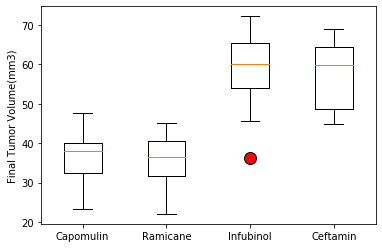

In [52]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
box_plt=dict(markerfacecolor="red",markersize=12)
plt.boxplot(tumor_vol_data,labels=treat_list,flierprops=box_plt)
plt.ylabel("Final Tumor Volume(mm3)")
plt.show()

## Line and Scatter Plots

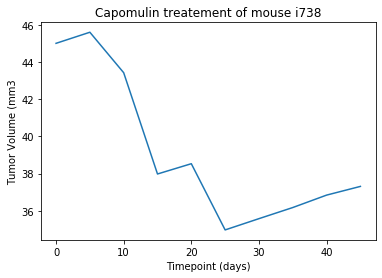

In [61]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_data = pharma_combine.loc[pharma_combine['Drug Regimen'] == 'Capomulin']
mouse_info = capomulin_data.loc[capomulin_data['Mouse ID'] == 'i738']
plt.plot(mouse_info['Timepoint'], mouse_info['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3')
plt.title('Capomulin treatement of mouse i738')
plt.show()                                               


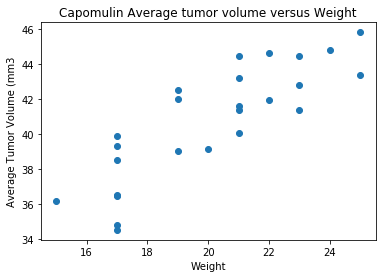

In [65]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
average_capo = capomulin_data.groupby(['Mouse ID']).mean()
plt.scatter(average_capo['Weight (g)'], average_capo['Tumor Volume (mm3)'])
plt.xlabel('Weight')
plt.ylabel('Average Tumor Volume (mm3')
plt.title('Capomulin Average tumor volume versus Weight')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


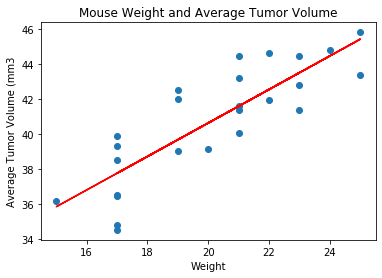

In [69]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = round(st.pearsonr(average_capo['Weight (g)'], average_capo['Tumor Volume (mm3)'])[0],2)
model=st.linregress(average_capo['Weight (g)'], average_capo['Tumor Volume (mm3)'])
yvalues = average_capo['Weight (g)']*model[0]+model[1]
print(f"The correlation between mouse weight and the average tumor volume is {correlation}")
plt.scatter(average_capo['Weight (g)'],average_capo['Tumor Volume (mm3)'])
plt.plot(average_capo['Weight (g)'],yvalues,color="red")
plt.xlabel('Weight')
plt.ylabel('Average Tumor Volume (mm3')
plt.title('Mouse Weight and Average Tumor Volume')
plt.show()

